# **`Business Understanding`**

Ride-hailing apps like Uber and Yassir rely on real-time data and machine learning algorithms to automate their services. Accurately predicting the estimated time of arrival (ETA) for Yassir trips will make Yassir’s services more reliable and attractive; this will have a direct and indirect impact on both customers and business partners. The solution would help the company save money and allocate more resources to other parts of the business.

**`The objective of this project is to predict the estimated time of arrival at the dropoff point for a single Yassir journey`**.

# **`Data Understanding`**

### **Train Data Columns Description** 
**ID:** Unique identifier for each trip.

**Timestamp:** The date and time when the trip occurred.

**Origin_lat:** Latitude of the starting location of the trip.

**Origin_lon:** Longitude of the starting location of the trip.

**Destination_lat:** Latitude of the destination location of the trip.

**Destination_lon:** Longitude of the destination location of the trip.

**Trip_distance:** The distance traveled along the fastest route for the trip.

### **Weather Data Columns Description**
**date:** Date of the weather data.

**dewpoint_2m_temperature:** Dewpoint 2m temperature (in Kelvin).

**maximum_2m_air_temperature:** Maximum 2m air temperature (in Kelvin).

**mean_2m_air_temperature:** Mean 2m air temperature (in Kelvin).

**mean_sea_level_pressure:** Mean sea level pressure (in Pa).

**minimum_2m_air_temperature:** Minimum 2m air temperature (in Kelvin).

**surface_pressure:** Surface pressure (in Pa).

**total_precipitation:** Total precipitation (in meters).

**u_component_of_wind_10m:** U component of wind at 10m above ground level (in m/s).

**v_component_of_wind_10m:** V component of wind at 10m above ground level (in m/s).

In [42]:
# Import Libraries
from matplotlib import pyplot as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load train dataset
train = pd.read_csv(r'..\Yassir Data\Yassir_Train.csv')

train.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [13]:
# Load weather dataset
weather = pd.read_csv(r'..\Yassir Data\Yassir_Weather.csv')

weather.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [40]:
# Load sample submission data
sample_submission = pd.read_csv(r'..\Yassir Data\Yassir_SampleSubmission.csv')

sample_submission.sample(5)

,ID,ETA
21387,LQXU9GR7,0
21336,LOVAOFO7,0
19460,JSX9H5LL,0
24691,OZ0DY96D,0
17457,HSP7Z77K,0


## **Train Data Exploratory Data Analysis (EDA)**

In [17]:
# Get data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [20]:
# Describe the dataset
round(train.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Origin_lat,83924.0,3.05,0.10,2.81,2.99,3.05,3.10,3.38
Origin_lon,83924.0,36.74,0.03,36.59,36.72,36.74,36.76,36.82
Destination_lat,83924.0,3.06,0.10,2.81,3.00,3.05,3.11,3.38
Destination_lon,83924.0,36.74,0.03,36.60,36.72,36.74,36.76,36.82
Trip_distance,83924.0,13527.82,9296.72,1.00,6108.00,11731.50,19369.00,62028.00
ETA,83924.0,1111.70,563.57,1.00,701.00,1054.00,1456.00,5238.00


In [22]:
# Check for duplicates
print(f"There are {train.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


## **Key Insights**
- No missing data in the train dataset
- There are 83964 rowa and 8 columns in the train dataset
- The average ETA is 1111.70
- There are 0 duplicates in the dataset
- Timestamp is an object instead of DateTime

### **Univarite Analysis**

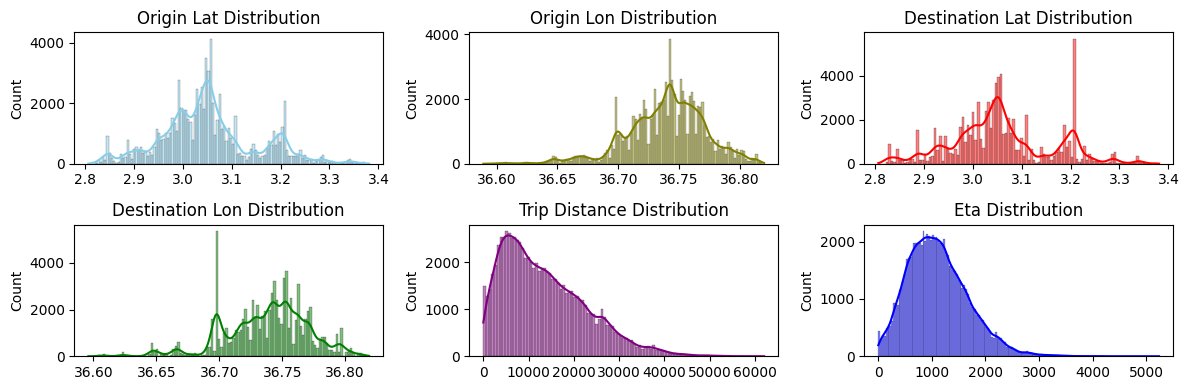

In [86]:
# Plot Histplots to show distribution of columns
fig, ax = plt.subplots(2, 3, figsize=(12, 4))

columns = train.select_dtypes(['float', 'int']).columns
colors = ['skyblue', 'olive', 'red', 'green', 'purple', 'blue']
titles = [f'{col.replace("_", " ").title()} Distribution' for col in columns]

for i in range(6):
    sns.histplot(train[columns[i]], ax=ax[i // 3, i % 3], kde=True, color=colors[i], fill=True)
    ax[i // 3, i % 3].set_xlabel('')  
    ax[i // 3, i % 3].set_title(titles[i])


plt.tight_layout()
plt.show()


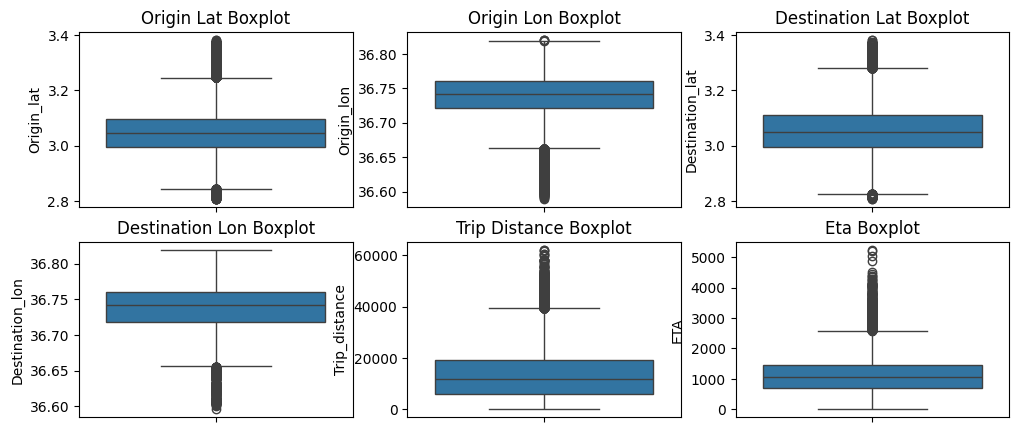

In [87]:
# Check for outliers
fig, ax = plt.subplots(2, 3, figsize=(12, 5))
titles = [f'{col.replace("_", " ").title()} Boxplot' for col in columns]

for i in range(6):
    sns.boxplot(train[columns[i]], ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_xlabel('')
    ax[i // 3, i % 3].set_title(titles[i])


## **Notes**
- All the columns are anomaly distributed
- The columns are not in the same range of values hence this will call for standardization
- Trip distance data is negatively skewed
- Eta almost follows a normal distribution
- The rest of the columns are unevenly distributed
